**Jupyter notebook for the creation of a fleet and  possible output analysis afterwards**

In [25]:
#Import packages
import os
import pandas as pd
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np 

#Path of the database 
path = r'C:\Users\janva\Emobpy\example\dbjup'

#Output name: Give different output name, depending on the situation/fleet 
Output_name = 'Jupyter_test'   

In [26]:
# Put in the number of generated files per electric vehicle and activity (inactive/working) from the database 
#Tesla model S
TS_inactive = 2
TS_working = 2

#Tesla model 3
T3_inactive = 0
T3_working = 0

#Renault Zoe 
RZ_inactive = 0
RZ_working = 0

#Hyundai Kona 
HK_inactive = 0
HK_working = 0

Now the composition of the fleet can be made by combining different car types and charging strategies. \
Do not exceed the number of generated files per EV in the database in the previous cell. \
Names are created by combining the following abbreviations: Car type + Activity_Chargig strategy

Car type &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Activiy&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Charging strategy \
TS = Tesla model S &emsp;&emsp;W = Working&emsp;&emsp;&emsp;&nbsp;B = Balanced charging strategy \
T3 = Tesla model 3 &emsp;&emsp;&nbsp;I = Inactive&emsp;&emsp;&emsp;&ensp;&ensp;U = Uncontrolled charging strategy\
RZ = Renault Zoe &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp;&nbsp;NC = Night charging strategy \
HK = Hyundai Kona


In [31]:
#@title Fleet generation sliders
[EV_TSW_balanced, EV_TSI_balanced, EV_T3W_balanced, EV_T3I_balanced, EV_RZW_balanced, EV_RZI_balanced, EV_HKW_balanced, EV_HKI_balanced] = [widgets.IntSlider(min=0,max=TS_working,value=0,description='TSW_B'),
                                                            widgets.IntSlider(min=0,max=TS_inactive,value=0,description='TSI_B'),
                                                            widgets.IntSlider(min=0,max=T3_working,value=0,description='T3W_B'),
                                                            widgets.IntSlider(min=0,max=T3_inactive,value=0,description='T3I_B'),
                                                            widgets.IntSlider(min=0,max=RZ_working,value=0,description='RZW_B'),
                                                            widgets.IntSlider(min=0,max=RZ_inactive,value=0,description='RZI_B'),
                                                            widgets.IntSlider(min=0,max=HK_working,value=0,description='HKW_B'),
                                                            widgets.IntSlider(min=0,max=HK_inactive,value=0,description='HKI_B')]

[EV_TSW_uncontrolled, EV_TSI_uncontrolled, EV_T3W_uncontrolled, EV_T3I_uncontrolled, EV_RZW_uncontrolled, EV_RZI_uncontrolled, EV_HKW_uncontrolled, EV_HKI_uncontrolled] = [widgets.IntSlider(min=0,max=TS_working,value=0,description='TSW_U'),
                                                            widgets.IntSlider(min=0,max=TS_inactive,value=0,description='TSI_U'),
                                                            widgets.IntSlider(min=0,max=T3_working,value=0,description='T3W_U'),
                                                            widgets.IntSlider(min=0,max=T3_inactive,value=0,description='T3I_U'),
                                                            widgets.IntSlider(min=0,max=RZ_working,value=0,description='RZW_U'),
                                                            widgets.IntSlider(min=0,max=RZ_inactive,value=0,description='RZI_U'),
                                                            widgets.IntSlider(min=0,max=HK_working,value=0,description='HKW_U'),
                                                            widgets.IntSlider(min=0,max=HK_inactive,value=0,description='HKI_U')]
                                              

[EV_TSW_nightcharge, EV_TSI_nightcharge, EV_T3W_nightcharge, EV_T3I_nightcharge, EV_RZW_nightcharge, EV_RZI_nightcharge, EV_HKW_nightcharge, EV_HKI_nightcharge] = [widgets.IntSlider(min=0,max=TS_working,value=0,description='TSW_NC'),
                                                            widgets.IntSlider(min=0,max=TS_inactive,value=0,description='TSI_NC'),
                                                            widgets.IntSlider(min=0,max=T3_working,value=0,description='T3W_NC'),
                                                            widgets.IntSlider(min=0,max=T3_inactive,value=0,description='T3I_NC'),
                                                            widgets.IntSlider(min=0,max=RZ_working,value=0,description='RZW_NC'),
                                                            widgets.IntSlider(min=0,max=RZ_inactive,value=0,description='RZI_NC'),
                                                            widgets.IntSlider(min=0,max=HK_working,value=0,description='HKW_NC'),
                                                            widgets.IntSlider(min=0,max=HK_inactive,value=0,description='HKI_NC')]


#widgets.HBox([widgets.VBox([a, b, c]), out])
B=widgets.VBox([EV_TSW_balanced, EV_TSI_balanced, EV_T3W_balanced, EV_T3I_balanced, EV_RZW_balanced, EV_RZI_balanced, EV_HKW_balanced, EV_HKI_balanced])
U=widgets.VBox([EV_TSW_uncontrolled, EV_TSI_uncontrolled, EV_T3W_uncontrolled, EV_T3I_uncontrolled, EV_RZW_uncontrolled, EV_RZI_uncontrolled, EV_HKW_uncontrolled, EV_HKI_uncontrolled])
NC=widgets.VBox([EV_TSW_nightcharge, EV_TSI_nightcharge, EV_T3W_nightcharge, EV_T3I_nightcharge, EV_RZW_nightcharge, EV_RZI_nightcharge, EV_HKW_nightcharge, EV_HKI_nightcharge])
display(widgets.HBox([B, U, NC]))



In [4]:
# Here the generated data will be will be combined and resampled into a single dataframe for each EV with the use of a loop. 
# For this case there will also be filtered on home location and stored in a different dataframe. 
# After that different charging strategies are extracted from the database and stored seperately. 

# Below the loops for the Tesla model S of inactive peope are provided including comments. 
# The import of all other EVs (working/inactive) is done is a simular way, this code is collapsed in the next cell. 

#Tesla model S - Inactive 
Data_TSI = list()                                                                 #Create empty lists and dataframes to store the data from the loop in
Charge_TSI = list()
TSI = list()
TSI_home = list()
# Fleet = list()                                        
TSI_balanced = pd.DataFrame()
TSI_uncontrolled = pd.DataFrame()
TSI_nightcharge = pd.DataFrame()
TSI_home_balanced = pd.DataFrame()
TSI_home_uncontrolled = pd.DataFrame()
TSI_home_nightcharge = pd.DataFrame()
TSI_state = pd.DataFrame()

for i in range (1,TS_inactive+1):                                                 #Loop for importing and combining all data from Emobpy 
    file_path_TSI = os.path.join(path,'TS','inactive'+str(i))
    Temp_data_TSI = pd.read_csv(os.path.join(file_path_TSI,"All_data.csv"))
    Temp_data_TSI['date'] = pd.DataFrame({'Hours': pd.date_range('2016-01-01', '2016-12-31', freq='15min')})
    Temp_data_TSI.set_index('date',inplace=True)
    Data_TSI.append(Temp_data_TSI)
    for l in range (0,len(TSI)):                                                  #Loop for storing the location of the EV
        TSI_state.loc[:,'TSI'+str(l)] = TSI[l]['state']
    Temp_charge_TSI = pd.read_csv(os.path.join(file_path_TSI,"bev_time_series.csv"),header=([0]),skiprows=[1,2,3])
    Temp_charge_TSI['date'] =  pd.DataFrame({'Hours': pd.date_range('2016-01-01', '2016-12-31', freq='1H')})
    Temp_charge_TSI = Temp_charge_TSI[['date', 'balanced_MWh', 'immediate_MWh', 'from_23_to_8_at_any_MWh', 'from_0_to_24_at_home_MWh']]
    Temp_charge_TSI.set_index('date',inplace=True)
    Temp_charge_TSI = Temp_charge_TSI.resample('15min').ffill()
    Charge_TSI.append(Temp_charge_TSI)
    Temp_TSI = pd.concat([Temp_data_TSI,Temp_charge_TSI],axis=1)
    TSI.append(Temp_TSI)
    Temp_TSI_home = Temp_TSI[Temp_TSI['state'].str.contains('home')]
    Temp_TSI_home = Temp_TSI_home.fillna(0)
    TSI_home.append(Temp_TSI_home)
    # for j in range (len(TSI)):                                                  #Loop of exporting every vehicle as seperate .csv file (not used in this situation)
    #     globals()[f"TSI{j}"] = TSI[j]
    #     TSI[j].to_csv(os.path.join(path2,'TSI'+str(j)+'.csv'))
    for k in range (len(TSI)):                                                    #Loop to store data from each charging strategy in a seperate dataframe
        TSI_balanced.loc[:,'TSIB'+str(k)] = TSI[k]['balanced_MWh']
        TSI_uncontrolled.loc[:,'TSIU'+str(k)] = TSI[k]['immediate_MWh']
        TSI_nightcharge.loc[:,'TSINC'+str(k)] = TSI[k]['from_23_to_8_at_any_MWh']
        TSI_home_balanced.loc[:,'TSIB'+str(k)] = TSI_home[k]['balanced_MWh']
        TSI_home_uncontrolled.loc[:,'TSIU'+str(k)] = TSI_home[k]['immediate_MWh']
        TSI_home_nightcharge.loc[:,'TSINC'+str(k)] = TSI_home[k]['from_23_to_8_at_any_MWh']

In [5]:
#@title Import data other EV models
#%% Tesla model S - Working
Data_TSW = list()
Charge_TSW = list()
TSW = list()
TSW_home = list()
TSW_balanced = pd.DataFrame()
TSW_uncontrolled = pd.DataFrame()
TSW_nightcharge = pd.DataFrame()
TSW_home_balanced = pd.DataFrame()
TSW_home_uncontrolled = pd.DataFrame()
TSW_home_nightcharge = pd.DataFrame()
TSW_state = pd.DataFrame()

for i in range (1,TS_working+1):
    file_path_TSW = os.path.join(path,'TS','working'+str(i))
    Temp_data_TSW = pd.read_csv(os.path.join(file_path_TSW,"All_data.csv"))
    Temp_data_TSW['date'] = pd.DataFrame({'Hours': pd.date_range('2016-01-01', '2016-12-31', freq='15min')})
    Temp_data_TSW.set_index('date',inplace=True)
    Data_TSW.append(Temp_data_TSW)
    for l in range (0,len(TSW)):
        TSW_state.loc[:,'TSW'+str(l)] = TSW[l]['state']
    Temp_charge_TSW = pd.read_csv(os.path.join(file_path_TSW,"bev_time_series.csv"),header=([0]),skiprows=[1,2,3])
    Temp_charge_TSW['date'] =  pd.DataFrame({'Hours': pd.date_range('2016-01-01', '2016-12-31', freq='1H')})
    Temp_charge_TSW = Temp_charge_TSW[['date', 'balanced_MWh', 'immediate_MWh', 'from_23_to_8_at_any_MWh', 'from_0_to_24_at_home_MWh']]
    Temp_charge_TSW.set_index('date',inplace=True)
    Temp_charge_TSW = Temp_charge_TSW.resample('15min').ffill()
    Charge_TSW.append(Temp_charge_TSW)
    Temp_TSW = pd.concat([Temp_data_TSW,Temp_charge_TSW],axis=1)
    TSW.append(Temp_TSW)
    Temp_TSW_home = Temp_TSW[Temp_TSW['state'].str.contains('home')]
    Temp_TSW_home = Temp_TSW_home.fillna(0)
    TSW_home.append(Temp_TSW_home)
    # for j in range (len(TSW)):
    #     globals()[f"TSW{j}"] = TSW[j]
    #     TSW[j].to_csv(os.path.join(path2,'TSW'+str(j)+'.csv'))
    for k in range (len(TSW)):
        TSW_balanced.loc[:,'TSWB'+str(k)] = TSW[k]['balanced_MWh']
        TSW_uncontrolled.loc[:,'TSWU'+str(k)] = TSW[k]['immediate_MWh']
        TSW_nightcharge.loc[:,'TSWNC'+str(k)] = TSW[k]['from_23_to_8_at_any_MWh']
        TSW_home_balanced.loc[:,'TSWB'+str(k)] = TSW_home[k]['balanced_MWh']
        TSW_home_uncontrolled.loc[:,'TSWU'+str(k)] = TSW_home[k]['immediate_MWh']
        TSW_home_nightcharge.loc[:,'TSWNC'+str(k)] = TSW_home[k]['from_23_to_8_at_any_MWh']

#%% Tesla model 3 - Inactive 
Data_T3I = list()
Charge_T3I = list()
T3I = list()
T3I_home = list()
T3I_balanced = pd.DataFrame()
T3I_uncontrolled = pd.DataFrame()
T3I_nightcharge = pd.DataFrame()
T3I_home_balanced = pd.DataFrame()
T3I_home_uncontrolled = pd.DataFrame()
T3I_home_nightcharge = pd.DataFrame()
T3I_state = pd.DataFrame()

for i in range (1,T3_inactive+1):
    file_path_T3I = os.path.join(path,'T3','inactive'+str(i))
    Temp_data_T3I = pd.read_csv(os.path.join(file_path_T3I,"All_data.csv"))
    Temp_data_T3I['date'] = pd.DataFrame({'Hours': pd.date_range('2016-01-01', '2016-12-31', freq='15min')})
    Temp_data_T3I.set_index('date',inplace=True)
    Data_T3I.append(Temp_data_T3I)
    for l in range (0,len(T3I)):
        T3I_state.loc[:,'T3I'+str(l)] = T3I[l]['state']
    Temp_charge_T3I = pd.read_csv(os.path.join(file_path_T3I,"bev_time_series.csv"),header=([0]),skiprows=[1,2,3])
    Temp_charge_T3I['date'] =  pd.DataFrame({'Hours': pd.date_range('2016-01-01', '2016-12-31', freq='1H')})
    Temp_charge_T3I = Temp_charge_T3I[['date', 'balanced_MWh', 'immediate_MWh', 'from_23_to_8_at_any_MWh', 'from_0_to_24_at_home_MWh']]
    Temp_charge_T3I.set_index('date',inplace=True)
    Temp_charge_T3I = Temp_charge_T3I.resample('15min').ffill()
    Charge_T3I.append(Temp_charge_T3I)
    Temp_T3I = pd.concat([Temp_data_T3I,Temp_charge_T3I],axis=1)
    T3I.append(Temp_T3I)
    Temp_T3I_home = Temp_T3I[Temp_T3I['state'].str.contains('home')]
    Temp_T3I_home = Temp_T3I_home.fillna(0)
    T3I_home.append(Temp_T3I_home)
    # for j in range (len(T3I)):
    #     globals()[f"T3I{j}"] = T3I[j]
    #     T3I[j].to_csv(os.path.join(path2,'T3I'+str(j)+'.csv'))
    for k in range (len(T3I)):
        T3I_balanced.loc[:,'T3IB'+str(k)] = T3I[k]['balanced_MWh']
        T3I_uncontrolled.loc[:,'T3IU'+str(k)] = T3I[k]['immediate_MWh']
        T3I_nightcharge.loc[:,'T3INC'+str(k)] = T3I[k]['from_23_to_8_at_any_MWh']
        T3I_home_balanced.loc[:,'T3IB'+str(k)] = T3I_home[k]['balanced_MWh']
        T3I_home_uncontrolled.loc[:,'T3IU'+str(k)] = T3I_home[k]['immediate_MWh']
        T3I_home_nightcharge.loc[:,'T3INC'+str(k)] = T3I_home[k]['from_23_to_8_at_any_MWh']


#%% Tesla model 3 - Working
Data_T3W = list()
Charge_T3W = list()
T3W = list()
T3W_home = list()
T3W_balanced = pd.DataFrame()
T3W_uncontrolled = pd.DataFrame()
T3W_nightcharge = pd.DataFrame()
T3W_home_balanced = pd.DataFrame()
T3W_home_uncontrolled = pd.DataFrame()
T3W_home_nightcharge = pd.DataFrame()
T3W_state = pd.DataFrame()

for i in range (1,T3_working+1):
    file_path_T3W = os.path.join(path,'T3','working'+str(i))
    Temp_data_T3W = pd.read_csv(os.path.join(file_path_T3W,"All_data.csv"))
    Temp_data_T3W['date'] = pd.DataFrame({'Hours': pd.date_range('2016-01-01', '2016-12-31', freq='15min')})
    Temp_data_T3W.set_index('date',inplace=True)
    Data_T3W.append(Temp_data_T3W)
    for l in range (0,len(T3W)):
        T3W_state.loc[:,'T3W'+str(l)] = T3W[l]['state']
    Temp_charge_T3W = pd.read_csv(os.path.join(file_path_T3W,"bev_time_series.csv"),header=([0]),skiprows=[1,2,3])
    Temp_charge_T3W['date'] =  pd.DataFrame({'Hours': pd.date_range('2016-01-01', '2016-12-31', freq='1H')})
    Temp_charge_T3W = Temp_charge_T3W[['date', 'balanced_MWh', 'immediate_MWh', 'from_23_to_8_at_any_MWh', 'from_0_to_24_at_home_MWh']]
    Temp_charge_T3W.set_index('date',inplace=True)
    Temp_charge_T3W = Temp_charge_T3W.resample('15min').ffill()
    Charge_T3W.append(Temp_charge_T3W)
    Temp_T3W = pd.concat([Temp_data_T3W,Temp_charge_T3W],axis=1)
    T3W.append(Temp_T3W)
    Temp_T3W_home = Temp_T3W[Temp_T3W['state'].str.contains('home')]
    Temp_T3W_home = Temp_T3W_home.fillna(0)
    T3W_home.append(Temp_T3W_home)
    # for j in range (len(T3W)):
    #     globals()[f"T3W{j}"] = T3W[j]
    #     T3W[j].to_csv(os.path.join(path2,'T3W'+str(j)+'.csv'))
    for k in range (len(T3W)):
        T3W_balanced.loc[:,'T3WB'+str(k)] = T3W[k]['balanced_MWh']
        T3W_uncontrolled.loc[:,'T3WU'+str(k)] = T3W[k]['immediate_MWh']
        T3W_nightcharge.loc[:,'T3WNC'+str(k)] = T3W[k]['from_23_to_8_at_any_MWh']
        T3W_home_balanced.loc[:,'T3WB'+str(k)] = T3W_home[k]['balanced_MWh']
        T3W_home_uncontrolled.loc[:,'T3WU'+str(k)] = T3W_home[k]['immediate_MWh']
        T3W_home_nightcharge.loc[:,'T3WNC'+str(k)] = T3W_home[k]['from_23_to_8_at_any_MWh']

#%% Renault Zoe - Inactive 
Data_RZI = list()
Charge_RZI = list()
RZI = list()
RZI_home = list()
RZI_balanced = pd.DataFrame()
RZI_uncontrolled = pd.DataFrame()
RZI_nightcharge = pd.DataFrame()
RZI_home_balanced = pd.DataFrame()
RZI_home_uncontrolled = pd.DataFrame()
RZI_home_nightcharge = pd.DataFrame()
RZI_state = pd.DataFrame()

for i in range (1,RZ_inactive+1):
    file_path_RZI = os.path.join(path,'RZ','inactive'+str(i))
    Temp_data_RZI = pd.read_csv(os.path.join(file_path_RZI,"All_data.csv"))
    Temp_data_RZI['date'] = pd.DataFrame({'Hours': pd.date_range('2016-01-01', '2016-12-31', freq='15min')})
    Temp_data_RZI.set_index('date',inplace=True)
    Data_RZI.append(Temp_data_RZI)
    for l in range (0,len(RZI)):
        RZI_state.loc[:,'RZI'+str(l)] = RZI[l]['state']
    Temp_charge_RZI = pd.read_csv(os.path.join(file_path_RZI,"bev_time_series.csv"),header=([0]),skiprows=[1,2,3])
    Temp_charge_RZI['date'] =  pd.DataFrame({'Hours': pd.date_range('2016-01-01', '2016-12-31', freq='1H')})
    Temp_charge_RZI = Temp_charge_RZI[['date', 'balanced_MWh', 'immediate_MWh', 'from_23_to_8_at_any_MWh', 'from_0_to_24_at_home_MWh']]
    Temp_charge_RZI.set_index('date',inplace=True)
    Temp_charge_RZI = Temp_charge_RZI.resample('15min').ffill()
    Charge_RZI.append(Temp_charge_RZI)
    Temp_RZI = pd.concat([Temp_data_RZI,Temp_charge_RZI],axis=1)
    RZI.append(Temp_RZI)
    Temp_RZI_home = Temp_RZI[Temp_RZI['state'].str.contains('home')]
    Temp_RZI_home = Temp_RZI_home.fillna(0)
    RZI_home.append(Temp_RZI_home)
    # for j in range (len(RZI)):
    #     globals()[f"RZI{j}"] = RZI[j]
    #     RZI[j].to_csv(os.path.join(path2,'RZI'+str(j)+'.csv'))
    for k in range (len(RZI)):
        RZI_balanced.loc[:,'RZIB'+str(k)] = RZI[k]['balanced_MWh']
        RZI_uncontrolled.loc[:,'RZIU'+str(k)] = RZI[k]['immediate_MWh']
        RZI_nightcharge.loc[:,'RZINC'+str(k)] = RZI[k]['from_23_to_8_at_any_MWh']
        RZI_home_balanced.loc[:,'RZIB'+str(k)] = RZI_home[k]['balanced_MWh']
        RZI_home_uncontrolled.loc[:,'RZIU'+str(k)] = RZI_home[k]['immediate_MWh']
        RZI_home_nightcharge.loc[:,'RZINC'+str(k)] = RZI_home[k]['from_23_to_8_at_any_MWh']


#%% Renault Zoe - Working
Data_RZW = list()
Charge_RZW = list()
RZW = list()
RZW_home = list()
RZW_balanced = pd.DataFrame()
RZW_uncontrolled = pd.DataFrame()
RZW_nightcharge = pd.DataFrame()
RZW_home_balanced = pd.DataFrame()
RZW_home_uncontrolled = pd.DataFrame()
RZW_home_nightcharge = pd.DataFrame()
RZW_state = pd.DataFrame()

for i in range (1,RZ_working+1):
    file_path_RZW = os.path.join(path,'RZ','working'+str(i))
    Temp_data_RZW = pd.read_csv(os.path.join(file_path_RZW,"All_data.csv"))
    Temp_data_RZW['date'] = pd.DataFrame({'Hours': pd.date_range('2016-01-01', '2016-12-31', freq='15min')})
    Temp_data_RZW.set_index('date',inplace=True)
    Data_RZW.append(Temp_data_RZW)
    for l in range (0,len(RZW)):
        RZW_state.loc[:,'RZW'+str(l)] = RZW[l]['state']
    Temp_charge_RZW = pd.read_csv(os.path.join(file_path_RZW,"bev_time_series.csv"),header=([0]),skiprows=[1,2,3])
    Temp_charge_RZW['date'] =  pd.DataFrame({'Hours': pd.date_range('2016-01-01', '2016-12-31', freq='1H')})
    Temp_charge_RZW = Temp_charge_RZW[['date', 'balanced_MWh', 'immediate_MWh', 'from_23_to_8_at_any_MWh', 'from_0_to_24_at_home_MWh']]
    Temp_charge_RZW.set_index('date',inplace=True)
    Temp_charge_RZW = Temp_charge_RZW.resample('15min').ffill()
    Charge_RZW.append(Temp_charge_RZW)
    Temp_RZW = pd.concat([Temp_data_RZW,Temp_charge_RZW],axis=1)
    RZW.append(Temp_RZW)
    Temp_RZW_home = Temp_RZW[Temp_RZW['state'].str.contains('home')]
    Temp_RZW_home = Temp_RZW_home.fillna(0)
    RZW_home.append(Temp_RZW_home)
    # for j in range (len(RZW)):
    #     globals()[f"RZW{j}"] = RZW[j]
    #     RZW[j].to_csv(os.path.join(path2,'RZW'+str(j)+'.csv'))
    for k in range (len(RZW)):
        RZW_balanced.loc[:,'RZWB'+str(k)] = RZW[k]['balanced_MWh']
        RZW_uncontrolled.loc[:,'RZWU'+str(k)] = RZW[k]['immediate_MWh']
        RZW_nightcharge.loc[:,'RZWNC'+str(k)] = RZW[k]['from_23_to_8_at_any_MWh']
        RZW_home_balanced.loc[:,'RZWB'+str(k)] = RZW_home[k]['balanced_MWh']
        RZW_home_uncontrolled.loc[:,'RZWU'+str(k)] = RZW_home[k]['immediate_MWh']
        RZW_home_nightcharge.loc[:,'RZWNC'+str(k)] = RZW_home[k]['from_23_to_8_at_any_MWh']

#%% Hyundai Kona - Inactive 
Data_HKI = list()
Charge_HKI = list()
HKI = list()
HKI_home = list()
HKI_balanced = pd.DataFrame()
HKI_uncontrolled = pd.DataFrame()
HKI_nightcharge = pd.DataFrame()
HKI_home_balanced = pd.DataFrame()
HKI_home_uncontrolled = pd.DataFrame()
HKI_home_nightcharge = pd.DataFrame()
HKI_state = pd.DataFrame()

for i in range (1,HK_inactive+1):
    file_path_HKI = os.path.join(path,'HK','inactive'+str(i))
    Temp_data_HKI = pd.read_csv(os.path.join(file_path_HKI,"All_data.csv"))
    Temp_data_HKI['date'] = pd.DataFrame({'Hours': pd.date_range('2016-01-01', '2016-12-31', freq='15min')})
    Temp_data_HKI.set_index('date',inplace=True)
    Data_HKI.append(Temp_data_HKI)
    for l in range (0,len(HKI)):
        HKI_state.loc[:,'HKI'+str(l)] = HKI[l]['state']
    Temp_charge_HKI = pd.read_csv(os.path.join(file_path_HKI,"bev_time_series.csv"),header=([0]),skiprows=[1,2,3])
    Temp_charge_HKI['date'] =  pd.DataFrame({'Hours': pd.date_range('2016-01-01', '2016-12-31', freq='1H')})
    Temp_charge_HKI = Temp_charge_HKI[['date', 'balanced_MWh', 'immediate_MWh', 'from_23_to_8_at_any_MWh', 'from_0_to_24_at_home_MWh']]
    Temp_charge_HKI.set_index('date',inplace=True)
    Temp_charge_HKI = Temp_charge_HKI.resample('15min').ffill()
    Charge_HKI.append(Temp_charge_HKI)
    Temp_HKI = pd.concat([Temp_data_HKI,Temp_charge_HKI],axis=1)
    HKI.append(Temp_HKI)
    Temp_HKI_home = Temp_HKI[Temp_HKI['state'].str.contains('home')]
    Temp_HKI_home = Temp_HKI_home.fillna(0)
    HKI_home.append(Temp_HKI_home)
    # Fleet.append(Temp_HKI)
    # for j in range (len(HKI)):
    #     globals()[f"HKI{j}"] = HKI[j]
    #     HKI[j].to_csv(os.path.join(path2,'HKI'+str(j)+'.csv'))
    for k in range (len(HKI)):
        HKI_balanced.loc[:,'HKIB'+str(k)] = HKI[k]['balanced_MWh']
        HKI_uncontrolled.loc[:,'HKIU'+str(k)] = HKI[k]['immediate_MWh']
        HKI_nightcharge.loc[:,'HKINC'+str(k)] = HKI[k]['from_23_to_8_at_any_MWh']
        HKI_home_balanced.loc[:,'HKIB'+str(k)] = HKI_home[k]['balanced_MWh']
        HKI_home_uncontrolled.loc[:,'HKIU'+str(k)] = HKI_home[k]['immediate_MWh']
        HKI_home_nightcharge.loc[:,'HKINC'+str(k)] = HKI_home[k]['from_23_to_8_at_any_MWh']

#%% Hyundai Kona - Working
Data_HKW = list()
Charge_HKW = list()
HKW = list()
HKW_home = list()
HKW_balanced = pd.DataFrame()
HKW_uncontrolled = pd.DataFrame()
HKW_nightcharge = pd.DataFrame()
HKW_home_balanced = pd.DataFrame()
HKW_home_uncontrolled = pd.DataFrame()
HKW_home_nightcharge = pd.DataFrame()
HKW_state = pd.DataFrame()

for i in range (1,HK_working+1):
    file_path_HKW = os.path.join(path,'HK','working'+str(i))
    Temp_data_HKW = pd.read_csv(os.path.join(file_path_HKW,"All_data.csv"))
    Temp_data_HKW['date'] = pd.DataFrame({'Hours': pd.date_range('2016-01-01', '2016-12-31', freq='15min')})
    Temp_data_HKW.set_index('date',inplace=True)
    Data_HKW.append(Temp_data_HKW)
    for l in range (0,len(HKW)):
        HKW_state.loc[:,'HKW'+str(l)] = HKW[l]['state']
    Temp_charge_HKW = pd.read_csv(os.path.join(file_path_HKW,"bev_time_series.csv"),header=([0]),skiprows=[1,2,3])
    Temp_charge_HKW['date'] =  pd.DataFrame({'Hours': pd.date_range('2016-01-01', '2016-12-31', freq='1H')})
    Temp_charge_HKW = Temp_charge_HKW[['date', 'balanced_MWh', 'immediate_MWh', 'from_23_to_8_at_any_MWh', 'from_0_to_24_at_home_MWh']]
    Temp_charge_HKW.set_index('date',inplace=True)
    Temp_charge_HKW = Temp_charge_HKW.resample('15min').ffill()
    Charge_HKW.append(Temp_charge_HKW)
    Temp_HKW = pd.concat([Temp_data_HKW,Temp_charge_HKW],axis=1)
    HKW.append(Temp_HKW)
    Temp_HKW_home = Temp_HKW[Temp_HKI['state'].str.contains('home')]
    Temp_HKW_home = Temp_HKW_home.fillna(0)
    HKW_home.append(Temp_HKW_home)
    # Fleet.append(Temp_HKW)
    # for j in range (len(HKW)):
    #     globals()[f"HKW{j}"] = HKW[j]
    #     HKW[j].to_csv(os.path.join(path2,'HKW'+str(j)+'.csv'))
    for k in range (len(HKW)):
        HKW_balanced.loc[:,'HKWB'+str(k)] = HKW[k]['balanced_MWh']
        HKW_uncontrolled.loc[:,'HKWU'+str(k)] = HKW[k]['immediate_MWh']
        HKW_nightcharge.loc[:,'HKWNC'+str(k)] = HKW[k]['from_23_to_8_at_any_MWh']
        HKW_home_balanced.loc[:,'HKWB'+str(k)] = HKW_home[k]['balanced_MWh']
        HKW_home_uncontrolled.loc[:,'HKWU'+str(k)] = HKW_home[k]['immediate_MWh']
        HKW_home_nightcharge.loc[:,'HKWNC'+str(k)] = HKW_home[k]['from_23_to_8_at_any_MWh']

In [6]:
# Here all the different charging strategies are combined per EV and activity to start creating a fleet. 
# The creation of the charging demand at home dataframe is done is the same way and is collapsed in the next cell. 
Fleet_TSW = TSW_balanced.iloc[:, 0:EV_TSW_balanced.value].sum(axis=1) + TSW_uncontrolled.iloc[:, EV_TSW_balanced.value:(EV_TSW_balanced.value+EV_TSW_uncontrolled.value)].sum(axis=1) + TSW_nightcharge.iloc[:, (EV_TSW_balanced.value+EV_TSW_uncontrolled.value):(EV_TSW_balanced.value+EV_TSW_uncontrolled.value+EV_TSW_nightcharge.value)].sum(axis=1)
Fleet_TSI = TSI_balanced.iloc[:, 0:EV_TSI_balanced.value].sum(axis=1) + TSI_uncontrolled.iloc[:, EV_TSI_balanced.value:(EV_TSI_balanced.value+EV_TSI_uncontrolled.value)].sum(axis=1) + TSI_nightcharge.iloc[:, (EV_TSI_balanced.value+EV_TSI_uncontrolled.value):(EV_TSI_balanced.value+EV_TSI_uncontrolled.value+EV_TSI_nightcharge.value)].sum(axis=1)
Fleet_T3W = T3W_balanced.iloc[:, 0:EV_T3W_balanced.value].sum(axis=1) + T3W_uncontrolled.iloc[:, EV_T3W_balanced.value:(EV_T3W_balanced.value+EV_T3W_uncontrolled.value)].sum(axis=1) + T3W_nightcharge.iloc[:, (EV_T3W_balanced.value+EV_T3W_uncontrolled.value):(EV_T3W_balanced.value+EV_T3W_uncontrolled.value+EV_T3W_nightcharge.value)].sum(axis=1)
Fleet_T3I = T3I_balanced.iloc[:, 0:EV_T3I_balanced.value].sum(axis=1) + T3I_uncontrolled.iloc[:, EV_T3I_balanced.value:(EV_T3I_balanced.value+EV_T3I_uncontrolled.value)].sum(axis=1) + T3I_nightcharge.iloc[:, (EV_T3I_balanced.value+EV_T3I_uncontrolled.value):(EV_T3I_balanced.value+EV_T3I_uncontrolled.value+EV_T3I_nightcharge.value)].sum(axis=1)
Fleet_RZW = RZW_balanced.iloc[:, 0:EV_RZW_balanced.value].sum(axis=1) + RZW_uncontrolled.iloc[:, EV_RZW_balanced.value:(EV_RZW_balanced.value+EV_RZW_uncontrolled.value)].sum(axis=1) + RZW_nightcharge.iloc[:, (EV_RZW_balanced.value+EV_RZW_uncontrolled.value):(EV_RZW_balanced.value+EV_RZW_uncontrolled.value+EV_RZW_nightcharge.value)].sum(axis=1)
Fleet_RZI = RZI_balanced.iloc[:, 0:EV_RZI_balanced.value].sum(axis=1) + RZI_uncontrolled.iloc[:, EV_RZI_balanced.value:(EV_RZI_balanced.value+EV_RZI_uncontrolled.value)].sum(axis=1) + RZI_nightcharge.iloc[:, (EV_RZI_balanced.value+EV_RZI_uncontrolled.value):(EV_RZI_balanced.value+EV_RZI_uncontrolled.value+EV_RZI_nightcharge.value)].sum(axis=1)
Fleet_HKW = HKW_balanced.iloc[:, 0:EV_HKW_balanced.value].sum(axis=1) + HKW_uncontrolled.iloc[:, EV_HKW_balanced.value:(EV_HKW_balanced.value+EV_HKW_uncontrolled.value)].sum(axis=1) + HKW_nightcharge.iloc[:, (EV_HKW_balanced.value+EV_HKW_uncontrolled.value):(EV_HKW_balanced.value+EV_HKW_uncontrolled.value+EV_HKW_nightcharge.value)].sum(axis=1) 
Fleet_HKI = HKI_balanced.iloc[:, 0:EV_HKI_balanced.value].sum(axis=1) + HKI_uncontrolled.iloc[:, EV_HKI_balanced.value:(EV_HKI_balanced.value+EV_HKI_uncontrolled.value)].sum(axis=1) + HKI_nightcharge.iloc[:, (EV_HKI_balanced.value+EV_HKI_uncontrolled.value):(EV_HKI_balanced.value+EV_HKI_uncontrolled.value+EV_HKI_nightcharge.value)].sum(axis=1)

# Here the charging demand of all different EVs and activity types are combined into a single dataframe. 
Fleet_15min = pd.concat([Fleet_TSW,Fleet_TSI,Fleet_T3W,Fleet_T3I,Fleet_RZW,Fleet_RZI,Fleet_HKW,Fleet_HKI],axis=1).fillna(0).sum(axis=1)
Fleet_15min.index.names = ['date']

# Resample the fleet to get the charging demand per hour over a whole year and calculate the total yearly charging demand of the fleet.  
Fleet_MWh = Fleet_15min.resample('h').mean()
Total_fleet_MWh = Fleet_MWh.sum()

# State (location) of the fleet
Fleet_state = pd.concat([TSI_state, TSW_state, T3I_state, T3W_state, RZI_state, RZW_state, HKI_state, HKW_state], axis=1)
Fleet_state.index.names = ['date']

In [7]:
#@title Fleet creation - home location 
# Same as the previous cell, but then for when the EVs are at the home location. This way the charging demand for the neighborhood can be calculated 
# Here all the different charging strategies are combined per EV to start creating a fleet. 
Fleet_TSW_home = TSW_home_balanced.iloc[:, 0:EV_TSW_balanced.value].sum(axis=1) + TSW_home_uncontrolled.iloc[:, EV_TSW_balanced.value:(EV_TSW_balanced.value+EV_TSW_uncontrolled.value)].sum(axis=1) + TSW_home_nightcharge.iloc[:, (EV_TSW_balanced.value+EV_TSW_uncontrolled.value):(EV_TSW_balanced.value+EV_TSW_uncontrolled.value+EV_TSW_nightcharge.value)].sum(axis=1) 
Fleet_TSI_home = TSI_home_balanced.iloc[:, 0:EV_TSI_balanced.value].sum(axis=1) + TSI_home_uncontrolled.iloc[:, EV_TSI_balanced.value:(EV_TSI_balanced.value+EV_TSI_uncontrolled.value)].sum(axis=1) + TSI_home_nightcharge.iloc[:, (EV_TSI_balanced.value+EV_TSI_uncontrolled.value):(EV_TSI_balanced.value+EV_TSI_uncontrolled.value+EV_TSI_nightcharge.value)].sum(axis=1)
Fleet_T3W_home = T3W_home_balanced.iloc[:, 0:EV_T3W_balanced.value].sum(axis=1) + T3W_home_uncontrolled.iloc[:, EV_T3W_balanced.value:(EV_T3W_balanced.value+EV_T3W_uncontrolled.value)].sum(axis=1) + T3W_home_nightcharge.iloc[:, (EV_T3W_balanced.value+EV_T3W_uncontrolled.value):(EV_T3W_balanced.value+EV_T3W_uncontrolled.value+EV_T3W_nightcharge.value)].sum(axis=1)
Fleet_T3I_home = T3I_home_balanced.iloc[:, 0:EV_T3I_balanced.value].sum(axis=1) + T3I_home_uncontrolled.iloc[:, EV_T3I_balanced.value:(EV_T3I_balanced.value+EV_T3I_uncontrolled.value)].sum(axis=1) + T3I_home_nightcharge.iloc[:, (EV_T3I_balanced.value+EV_T3I_uncontrolled.value):(EV_T3I_balanced.value+EV_T3I_uncontrolled.value+EV_T3I_nightcharge.value)].sum(axis=1)
Fleet_RZW_home = RZW_home_balanced.iloc[:, 0:EV_RZW_balanced.value].sum(axis=1) + RZW_home_uncontrolled.iloc[:, EV_RZW_balanced.value:(EV_RZW_balanced.value+EV_RZW_uncontrolled.value)].sum(axis=1) + RZW_home_nightcharge.iloc[:, (EV_RZW_balanced.value+EV_RZW_uncontrolled.value):(EV_RZW_balanced.value+EV_RZW_uncontrolled.value+EV_RZW_nightcharge.value)].sum(axis=1)
Fleet_RZI_home = RZI_home_balanced.iloc[:, 0:EV_RZI_balanced.value].sum(axis=1) + RZI_home_uncontrolled.iloc[:, EV_RZI_balanced.value:(EV_RZI_balanced.value+EV_RZI_uncontrolled.value)].sum(axis=1) + RZI_home_nightcharge.iloc[:, (EV_RZI_balanced.value+EV_RZI_uncontrolled.value):(EV_RZI_balanced.value+EV_RZI_uncontrolled.value+EV_RZI_nightcharge.value)].sum(axis=1)
Fleet_HKW_home = HKW_home_balanced.iloc[:, 0:EV_HKW_balanced.value].sum(axis=1) + HKW_home_uncontrolled.iloc[:, EV_HKW_balanced.value:(EV_HKW_balanced.value+EV_HKW_uncontrolled.value)].sum(axis=1) + HKW_home_nightcharge.iloc[:, (EV_HKW_balanced.value+EV_HKW_uncontrolled.value):(EV_HKW_balanced.value+EV_HKW_uncontrolled.value+EV_HKW_nightcharge.value)].sum(axis=1)
Fleet_HKI_home = HKI_home_balanced.iloc[:, 0:EV_HKI_balanced.value].sum(axis=1) + HKI_home_uncontrolled.iloc[:, EV_HKI_balanced.value:(EV_HKI_balanced.value+EV_HKI_uncontrolled.value)].sum(axis=1) + HKI_home_nightcharge.iloc[:, (EV_HKI_balanced.value+EV_HKI_uncontrolled.value):(EV_HKI_balanced.value+EV_HKI_uncontrolled.value+EV_HKI_nightcharge.value)].sum(axis=1)

#Here the charging demand of all different EVs are combined into a single dataframe
Fleet_home_15min = pd.concat([Fleet_TSW_home,Fleet_TSI_home,Fleet_T3W_home,Fleet_T3I_home,Fleet_RZW_home,Fleet_RZI_home,Fleet_HKW_home,Fleet_HKI_home],axis=1).fillna(0).sum(axis=1)
Fleet_home_15min.index.names = ['date']

#Resample the fleet to get the charging demand per hour over a whole year and calculate the total yearly charging demand of the fleet 
Fleet_home_MWh = Fleet_home_15min.resample('h').mean()
Total_fleet_home_MWh = Fleet_home_MWh.sum()


In [8]:
# You can now take a look at the houly charging demand of the whole fleet. 
Fleet_MWh

date
2016-01-01 00:00:00    0.006295
2016-01-01 01:00:00    0.006295
2016-01-01 02:00:00    0.006295
2016-01-01 03:00:00    0.006295
2016-01-01 04:00:00    0.006295
                         ...   
2016-12-30 19:00:00    0.000762
2016-12-30 20:00:00    0.000762
2016-12-30 21:00:00    0.000762
2016-12-30 22:00:00    0.000762
2016-12-30 23:00:00    0.000191
Freq: H, Length: 8760, dtype: float64

In [9]:
# The charging demand of the created fleet can be exported to save the current situation and compare this with other situations in 
# further analysis. Some possible analysis will be performed in this notebook. 

# Name of the output file can be set at the begin of the notebook
output_path = os.path.join(r'C:\Users\janva\Emobpy\example\dbjup','Fleets',Output_name+".csv")
output_path_home = os.path.join(r'C:\Users\janva\Emobpy\example\dbjup','Fleets',Output_name+"_home.csv")
output_path_state = os.path.join(r'C:\Users\janva\Emobpy\example\dbjup','Fleets',Output_name+"_state.csv")

Fleet_MWh.to_csv(output_path)
Fleet_home_MWh.to_csv(output_path_home)
Fleet_state.to_csv(output_path_state)

**Analysis of the created fleet**\
Here multiple fleets and/or charging strategies can be compared to eachother. 

In [10]:
#Load in and combine the data
# To analyze the charging demand of the created fleet the data has to be loaded in. In this example the created fleet is loaded in, but this can also be a fleet that 
# is created and exported at an earlier moment in time. 
Fleet1_uncontrolled = Fleet_MWh
Fleet1_uncontrolled_home = Fleet_home_MWh
Fleet1_state = Fleet_state

#Combine different fleets and/or location depended fleets 
data = [Fleet1_uncontrolled, Fleet1_uncontrolled_home]
headers = ['Uncontrolled','Uncontrolled_home']
Fleet = pd.concat(data,axis=1,keys=headers)

#Set datetime index
Fleet.index = pd.to_datetime(Fleet.index)

#MWh to kWh
Fleet = Fleet*1000

#Remove outliers if needed 
Fleet[Fleet > 500] = 0


<Figure size 640x480 with 0 Axes>

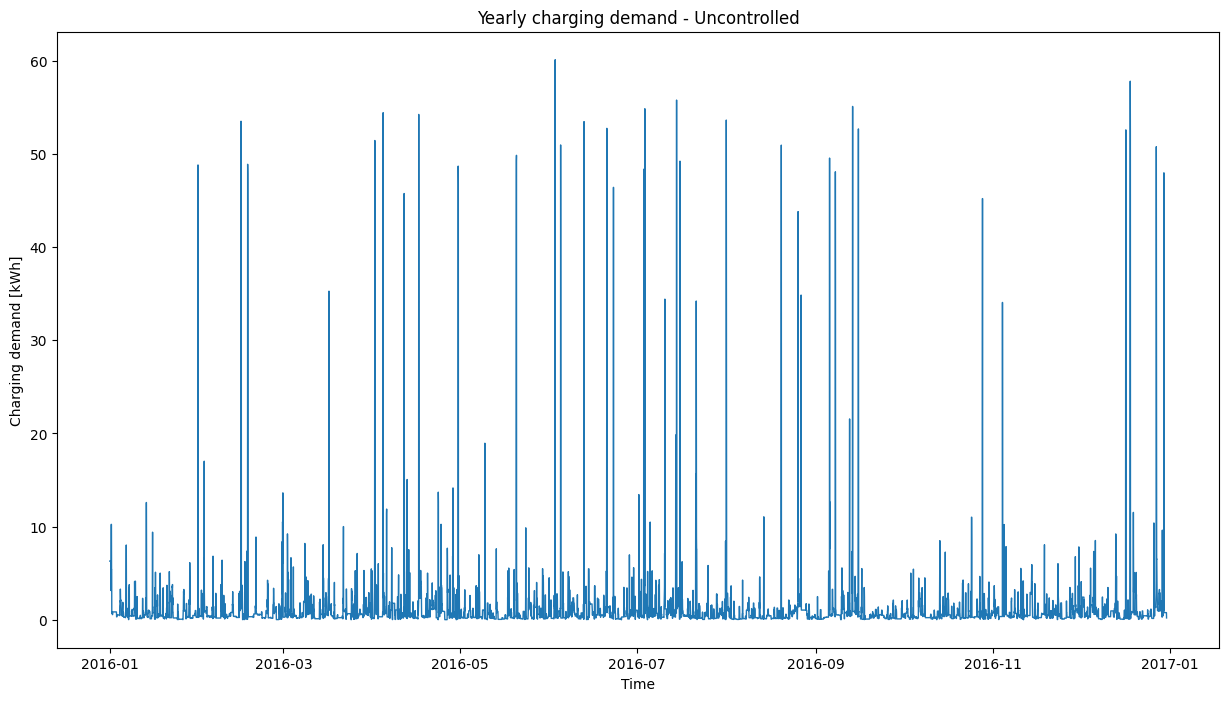

Uncontrolled         10717.843025
Uncontrolled_home     3464.662208
dtype: float64

In [11]:
# Lets first take a look at the yearly charging demand by simply plotting the charging profile of the created fleet
plt.figure()
plt.figure(figsize=(15,8))
plt.plot(Fleet['Uncontrolled'],linewidth=1)
plt.title('Yearly charging demand - Uncontrolled')
plt.xlabel('Time')
plt.ylabel('Charging demand [kWh]')
plt.show()

#Total charging demand 
Total_Fleet_kWh = Fleet.sum()
Total_Fleet_kWh

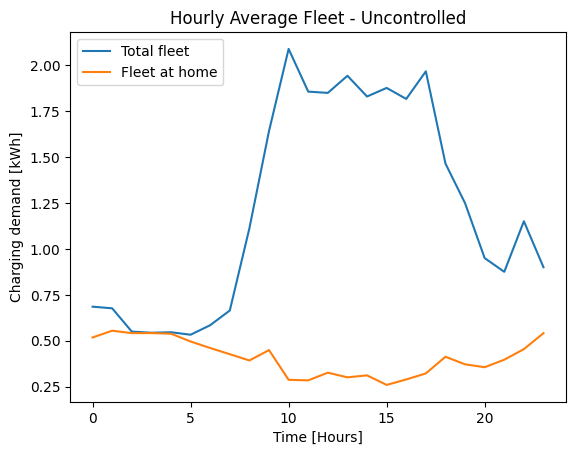

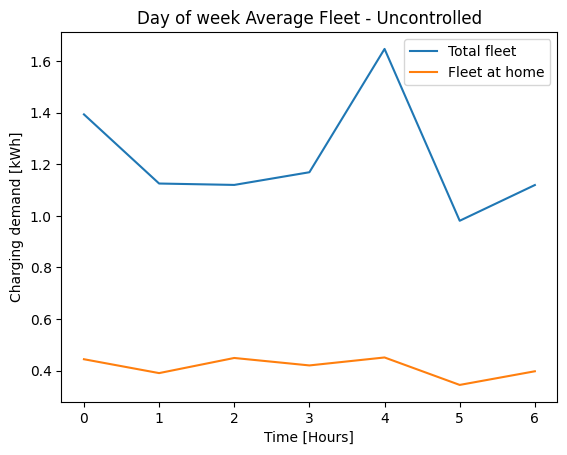

In [12]:
# Because a plot of the yearly charging demand does not give a clear indication of what is happening, plots with the
# average of each hour of the day and a plot with the average of each day of the week are generated.

#Hourly average
Houravg_Fleet = Fleet.groupby(Fleet.index.hour).mean()

#Weekly average
Weekavg_Fleet = Fleet.groupby(Fleet.index.dayofweek).mean()

#Plots 
#Hourly average - Uncontrolled charging strategy 
plt.figure()
plt.plot(Houravg_Fleet['Uncontrolled'])
plt.plot(Houravg_Fleet['Uncontrolled_home'])
plt.title('Hourly Average Fleet - Uncontrolled')
plt.legend(['Total fleet','Fleet at home'])
plt.xlabel('Time [Hours]')
plt.ylabel('Charging demand [kWh]')
plt.show()

#Weekly average - Uncontrolled charging strategy 
plt.figure()
plt.plot(Weekavg_Fleet['Uncontrolled'])
plt.plot(Weekavg_Fleet['Uncontrolled_home'])
plt.title('Day of week Average Fleet - Uncontrolled')
plt.legend(['Total fleet','Fleet at home'])
plt.xlabel('Time [Hours]')
plt.ylabel('Charging demand [kWh]')
plt.show()


<Figure size 640x480 with 0 Axes>

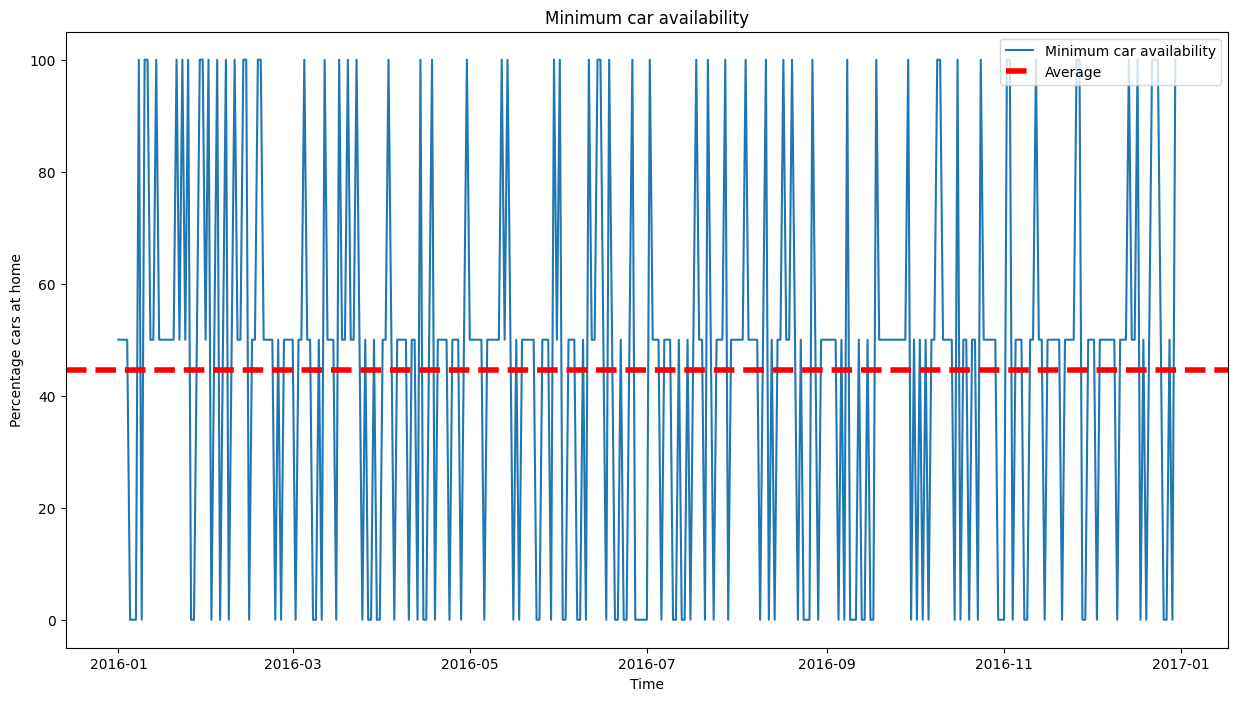

<Figure size 640x480 with 0 Axes>

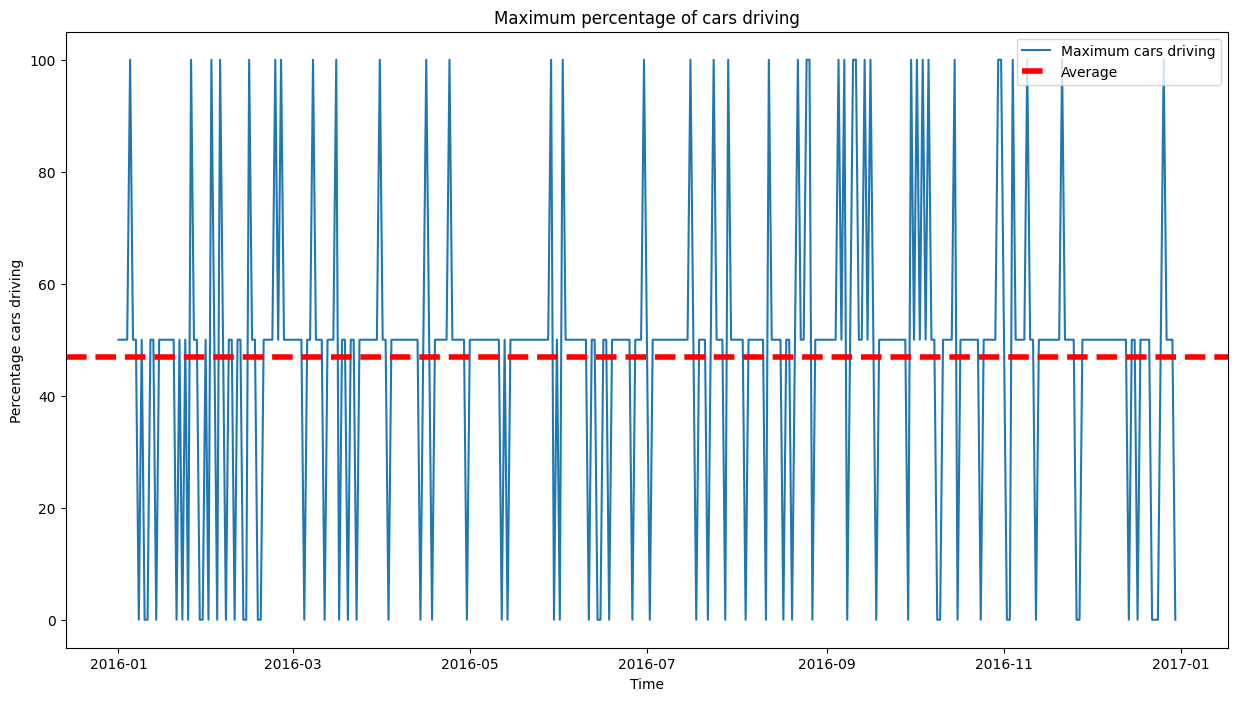

In [13]:
# Another possibility is looking at the location/availability of the cars to compare them to for example a stationary 
# home battery. Below the home location and driving are filtered, but this is possible for multiple other locations/activities. 

#%% Home location 
Home_Fleet = Fleet1_state.replace(['home'],1)
Home_Fleet = Home_Fleet.replace(['errands','escort','leisure','shopping','workplace','driving'],0)
Total_Home_Fleet = Home_Fleet.sum(axis=1)/len(Home_Fleet.columns)*100
Total_Home_Fleet.index = pd.to_datetime(Total_Home_Fleet.index)
Total_Home_Fleet = Total_Home_Fleet.resample('d').min()                         #Minimum availability 
Total_Home_Fleet_avg = Total_Home_Fleet.mean()

#%% Driving cars
Driving_Fleet = Fleet1_state.replace(['driving'],1)
Driving_Fleet = Driving_Fleet.replace(['errands','escort','leisure','shopping','workplace','home'],0)
Total_Driving_Fleet = Driving_Fleet.sum(axis=1)/len(Home_Fleet.columns)*100
Total_Driving_Fleet.index = pd.to_datetime(Total_Driving_Fleet.index)
Total_Driving_Fleet = Total_Driving_Fleet.resample('d').max()                   #Maximum cars driving
Total_Driving_Fleet_avg = Total_Driving_Fleet.mean()

#Plots 
#Minimum car availability at home 
plt.figure()
plt.figure(figsize=(15,8))
plt.plot(Total_Home_Fleet)
plt.axhline(y=Total_Home_Fleet_avg, color = 'r', linestyle = '--',linewidth=4)
plt.title('Minimum car availability')
plt.xlabel('Time')
plt.ylabel('Percentage cars at home')
plt.legend(['Minimum car availability','Average'])
plt.show()

#Maximum percentage of cars driving 
plt.figure()
plt.figure(figsize=(15,8))
plt.plot(Total_Driving_Fleet)
plt.axhline(y=Total_Driving_Fleet_avg, color = 'r', linestyle = '--',linewidth=4)
plt.title('Maximum percentage of cars driving')
plt.xlabel('Time')
plt.ylabel('Percentage cars driving')
plt.legend(['Maximum cars driving','Average'])
plt.show()

# Comparisson of different charging strategies
In the previous cells, a fleet was created and briefly analyzed. Now we are going to compare the charging demand of different charging strategies with eachother. For this example, a fleet of 200 Electric Vehicles is already generated and can be loaded in. This fleet exists of the following cars: 30 Renault Zoe's, 70 Tesla model 3's, 40 Tesla model S's and 60 Hyundai Kona's. 75% of these cars are owned by working owners and 25% are owned by inactive owners. 

In [14]:
# First a comparisson between different charging strategies will be made, which is done by creating 2 different fleets. 
# All EVs in a fleet will have the same charging strategy (Uncontrolled or Night Charging). 

#Import the fleet files 
path_fleet = r'C:\Users\janva\Emobpy\example\dbjup\Fleets/'

#Situation 1 - Uncontrolled
Fleet_uncontrolled = pd.read_csv(path_fleet+'Fleet1_uncontrolled.csv').set_index('date')
Fleet_uncontrolled_home = pd.read_csv(path_fleet+'Fleet1_uncontrolled_home.csv').set_index('date')

#Situation 2 - Night Charge 
Fleet_nightcharge = pd.read_csv(path_fleet+'Fleet1_nightcharge.csv').set_index('date')
Fleet_nightcharge_home = pd.read_csv(path_fleet+'Fleet1_nightcharge_home.csv').set_index('date')


#Combine different fleets and/or locations 
data = [Fleet_uncontrolled, Fleet_uncontrolled_home, Fleet_nightcharge, Fleet_nightcharge_home]
headers = ['Uncontrolled','Uncontrolled_home','Nightcharge','Nightcharge_home']
Fleet1 = pd.concat(data,axis=1,keys=headers)

#Set datetime index
Fleet1.index = pd.to_datetime(Fleet1.index)

#MWh to kWh
Fleet1 = Fleet1*1000

#Remove outliers
Fleet1[Fleet1 > 500] = 0



In [15]:
# Again generate hourly and daily average consumptions to compare the different situations with eachother 
#Hourly average
Houravg_Fleet1 = Fleet1.groupby(Fleet1.index.hour).mean()

#Weekly average
Weekavg_Fleet1 = Fleet1.groupby(Fleet1.index.dayofweek).mean()

# The total charging demand is easy obtainable. The total charging demand of both fleets should not differ too much, to make sure both situations are comparable.
Total_Fleet1_kWh = Fleet1.sum()
Total_Fleet1_kWh

Uncontrolled       0    456556.446850
Uncontrolled_home  0    154302.345183
Nightcharge        0    457518.553100
Nightcharge_home   0    280097.895350
dtype: float64

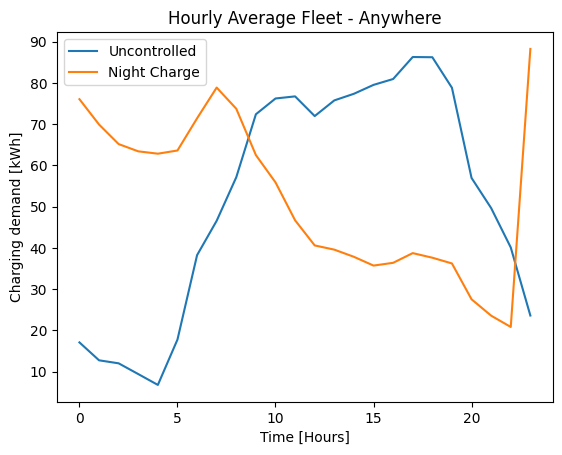

In [16]:
# As you can see the charging demand of the whole fleet is nearly the same, but there is a difference between the charging demand
# at home between uncontrolled charging and night charging. This makes sense, because EVs charging at night will more often be parked at home. 

# Now compare the charging demand (hourly average) of the different charging strategies of the whole fleet (charging anywhere)

#Hourly average - Anywhere
plt.figure()
plt.plot(Houravg_Fleet1['Uncontrolled'])
plt.plot(Houravg_Fleet1['Nightcharge'])
plt.title('Hourly Average Fleet - Anywhere')
plt.legend(['Uncontrolled','Night Charge'])
plt.xlabel('Time [Hours]')
plt.ylabel('Charging demand [kWh]')
plt.show()

# As you can see in the graph, uncontrolled charging and night charging have a comparable peak when looking at the any location, 
# but have those peaks during other times of the day (after 23:00 for night charging and around 19:00 for uncontrolled charging). 

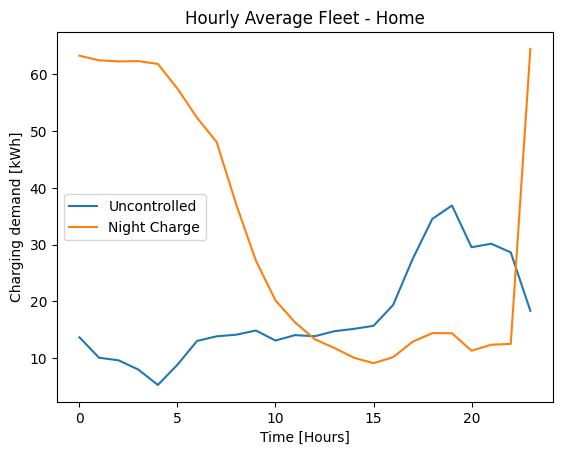

In [17]:
#Hourly average - Home
plt.figure()
plt.plot(Houravg_Fleet1['Uncontrolled_home'])
plt.plot(Houravg_Fleet1['Nightcharge_home'])
plt.title('Hourly Average Fleet - Home')
plt.legend(['Uncontrolled','Night Charge'])
plt.xlabel('Time [Hours]')
plt.ylabel('Charging demand [kWh]')
plt.show()

# When looking at the charging demand at home, night charging has a higher peak compared to the uncontrolled charging. 
# This difference can be explained by the fact that when a EV uses night charging it would more ofter be at home then at 
# any other location and the fact that the total charging demand at home is higher for night charging as seen before. 

# Combining different strategies 
If you want to reduce the peaks of both charging strategies you could for example look at combining the strategies, because both strategies have peaks during different times of the day. Now we will take a look at what will happen if we combine different charging strategies. \
For this example 3 different charging strategies in Emobpy are combined. The charging strategies are uncontrolled charging, night charging and balanced charging. Balanced charing is a smart charging strategy where the car does not charge at full power. The charging strategy uses the time of departure to charge the car with a lower rate during a longer time period. \
The same 200 EVs will be used and are divided as follows: 30% balanced, 20% immediate and 50% night charge. \
To make sure the stochastic generation of the EV profiles does not have a mayor impact, the uncontrolled, night charge and combined charging strategies fleets are simulated twice to generate an average. 


In [18]:
#@title Load in and combine different fleets as done in previous cells 
#Situation 1 - Uncontrolled
Fleet_uncontrolled = pd.read_csv(path_fleet+'Fleet1_uncontrolled.csv').set_index('date')
Fleet_uncontrolled_home = pd.read_csv(path_fleet +'Fleet1_uncontrolled_home.csv').set_index('date')
Fleet1_state = pd.read_csv(path_fleet +'Fleet1_uncontrolled_state.csv').set_index('date')
Fleet_uncontrolled2 = pd.read_csv(path_fleet+'Fleet1_uncontrolled2.csv').set_index('date')
Fleet_uncontrolled2_home = pd.read_csv(path_fleet +'Fleet1_uncontrolled2_home.csv').set_index('date')

#Situation 2 - Night Charge 
Fleet_nightcharge = pd.read_csv(path_fleet+'Fleet1_nightcharge.csv').set_index('date')
Fleet_nightcharge_home = pd.read_csv(path_fleet +'Fleet1_nightcharge_home.csv').set_index('date')
Fleet_nightcharge2 = pd.read_csv(path_fleet+'Fleet1_nightcharge2.csv').set_index('date')
Fleet_nightcharge2_home = pd.read_csv(path_fleet +'Fleet1_nightcharge2_home.csv').set_index('date')

#Situation 3 - Combined charging strategies 
Fleet_combined = pd.read_csv(path_fleet+'Fleet1_combinedstrategies.csv').set_index('date')
Fleet_combined_home = pd.read_csv(path_fleet +'Fleet1_combinedstrategies_home.csv').set_index('date')
Fleet_combined2 = pd.read_csv(path_fleet+'Fleet1_combinedstrategies2.csv').set_index('date')
Fleet_combined2_home = pd.read_csv(path_fleet +'Fleet1_combinedstrategies2_home.csv').set_index('date')

#Combine different fleets and/or locations 
data = [Fleet_uncontrolled['0'], Fleet_uncontrolled_home['0'], Fleet_uncontrolled2['0'], Fleet_uncontrolled2_home['0'], Fleet_nightcharge['0'], Fleet_nightcharge_home['0'], Fleet_nightcharge2['0'], Fleet_nightcharge2_home['0'], Fleet_combined['0'], Fleet_combined_home['0'], Fleet_combined2['0'], Fleet_combined2_home['0']]
headers = ['Uncontrolled','Uncontrolled_home', 'Uncontrolled2','Uncontrolled2_home', 'Nightcharge','Nightcharge_home', 'Nightcharge2','Nightcharge2_home','Combined','Combined_home','Combined2','Combined2_home']
Fleet1 = pd.concat(data,axis=1,keys=headers)

#Set datetime index
Fleet1.index = pd.to_datetime(Fleet1.index)

#MWh to kWh
Fleet1 = Fleet1*1000

#Remove outliers
Fleet1[Fleet1 > 500] = 0


<Figure size 640x480 with 0 Axes>

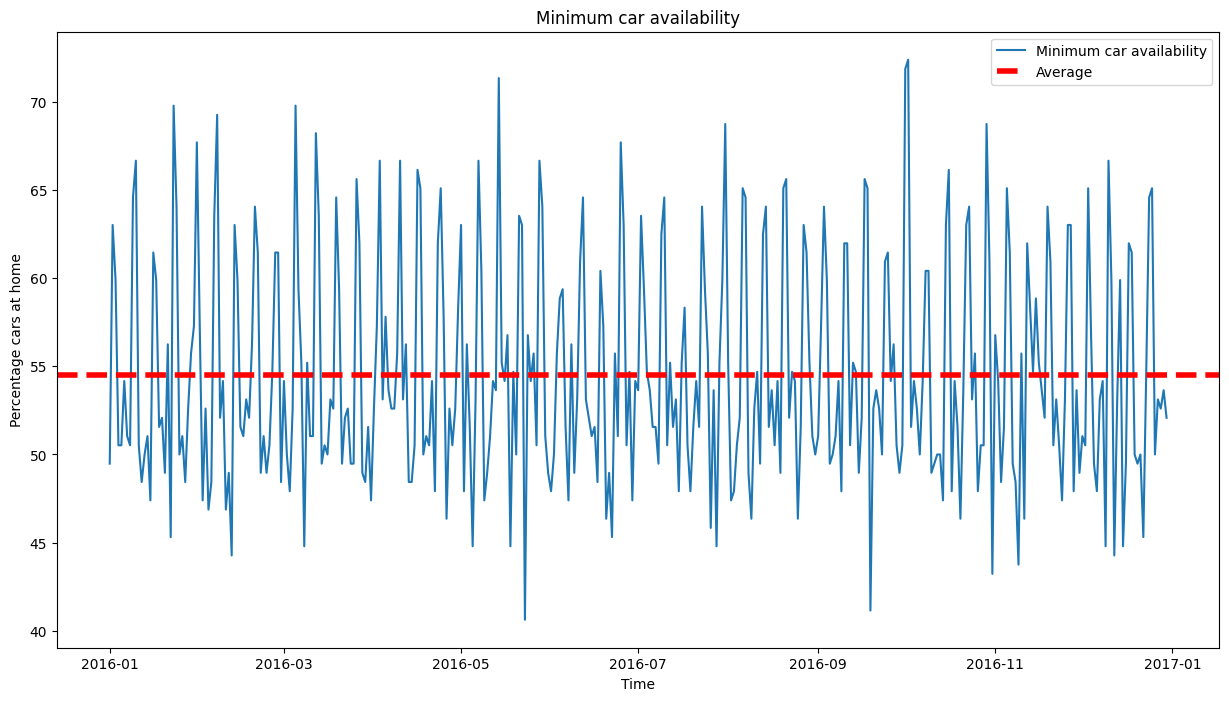

<Figure size 640x480 with 0 Axes>

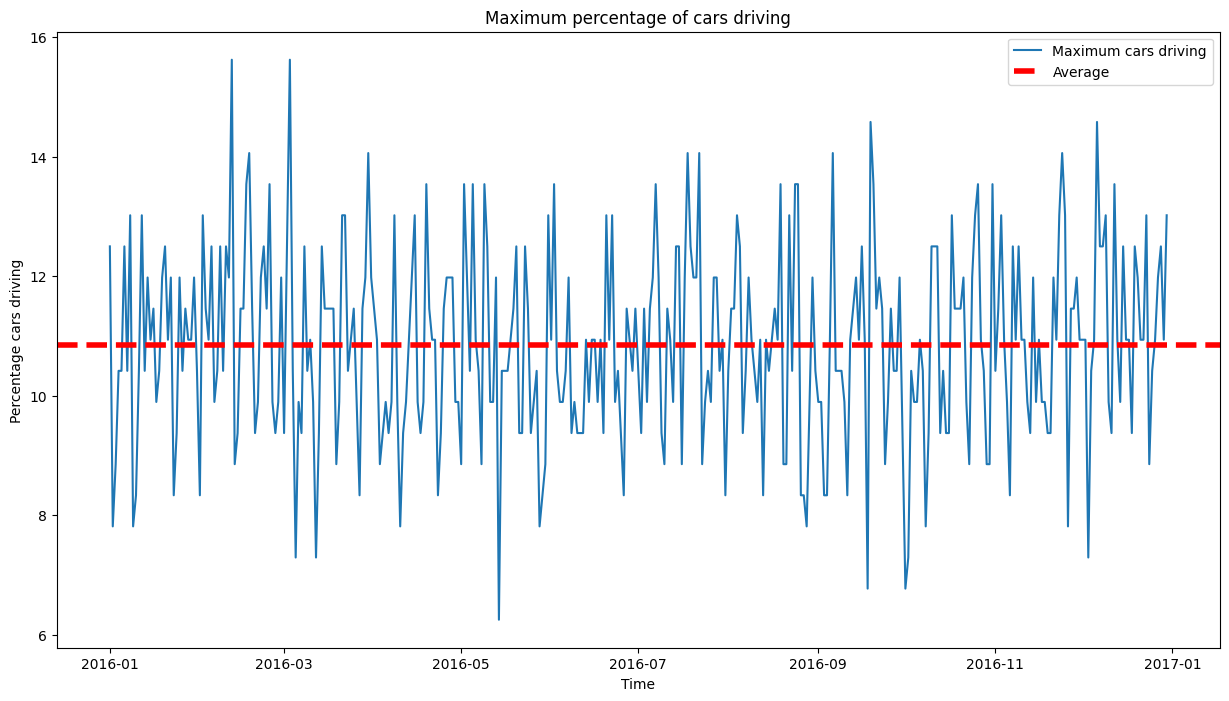

In [19]:
#The location/activity of this larger fleet can also be analysed:   
# Home location 
Home_Fleet = Fleet1_state.replace(['home'],1)
Home_Fleet = Home_Fleet.replace(['errands','escort','leisure','shopping','workplace','driving'],0)
Total_Home_Fleet = Home_Fleet.sum(axis=1)/len(Home_Fleet.columns)*100
Total_Home_Fleet.index = pd.to_datetime(Total_Home_Fleet.index)
Total_Home_Fleet = Total_Home_Fleet.resample('d').min()                         #Minimum availability 
Total_Home_Fleet_avg = Total_Home_Fleet.mean()

# Driving 
Driving_Fleet = Fleet1_state.replace(['driving'],1)
Driving_Fleet = Driving_Fleet.replace(['errands','escort','leisure','shopping','workplace','home'],0)
Total_Driving_Fleet = Driving_Fleet.sum(axis=1)/len(Home_Fleet.columns)*100
Total_Driving_Fleet.index = pd.to_datetime(Total_Driving_Fleet.index)
Total_Driving_Fleet = Total_Driving_Fleet.resample('d').max()                   #Maximum cars driving
Total_Driving_Fleet_avg = Total_Driving_Fleet.mean()

#Plots  
#Minimum cars at home 
plt.figure()
plt.figure(figsize=(15,8))
plt.plot(Total_Home_Fleet)
plt.axhline(y=Total_Home_Fleet_avg, color = 'r', linestyle = '--',linewidth=4)
plt.title('Minimum car availability')
plt.xlabel('Time')
plt.ylabel('Percentage cars at home')
plt.legend(['Minimum car availability','Average'])
plt.show()

#Driving cars 
plt.figure()
plt.figure(figsize=(15,8))
plt.plot(Total_Driving_Fleet)
plt.axhline(y=Total_Driving_Fleet_avg, color = 'r', linestyle = '--',linewidth=4)
plt.title('Maximum percentage of cars driving')
plt.xlabel('Time')
plt.ylabel('Percentage cars driving')
plt.legend(['Maximum cars driving','Average'])
plt.show()

<Figure size 640x480 with 0 Axes>

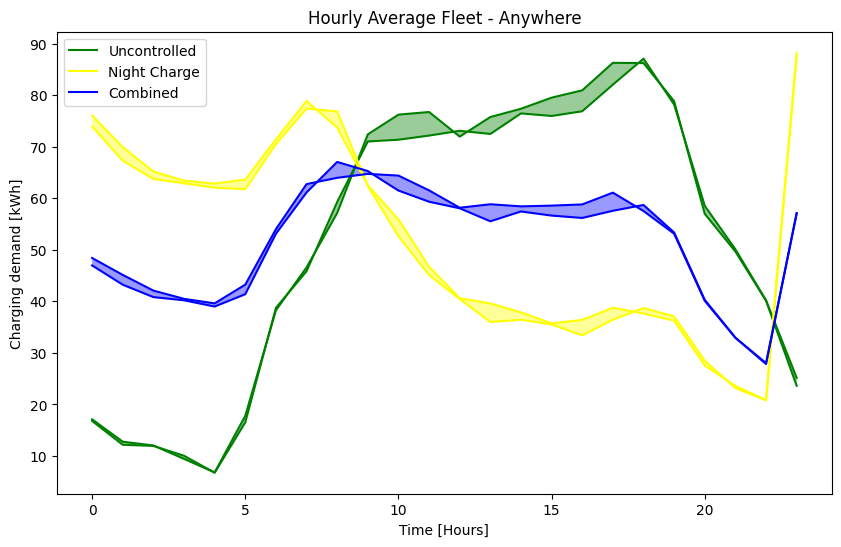

<Figure size 640x480 with 0 Axes>

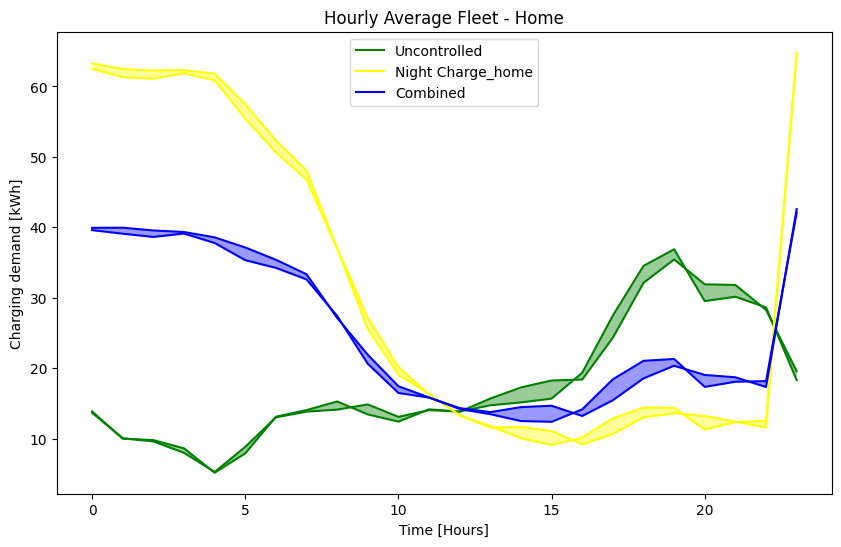

In [20]:
# Comparisson situations 
#Hourly average
Houravg_Fleet1 = Fleet1.groupby(Fleet1.index.hour).mean()

#Hourly average anywhere 
plt.figure()
x = np.arange(0,24)
plt.figure(figsize=(10,6))
plt.plot(Houravg_Fleet1['Uncontrolled'],color='green',label='Uncontrolled')
plt.plot(Houravg_Fleet1['Uncontrolled2'],color='green')
plt.fill_between(x,Houravg_Fleet1['Uncontrolled'], Houravg_Fleet1['Uncontrolled2'],facecolor='green',alpha=0.4)
plt.plot(Houravg_Fleet1['Nightcharge'],color='yellow',label='Night Charge')
plt.plot(Houravg_Fleet1['Nightcharge2'],color='yellow')
plt.fill_between(x,Houravg_Fleet1['Nightcharge'], Houravg_Fleet1['Nightcharge2'],facecolor='yellow',alpha=0.4)
plt.plot(Houravg_Fleet1['Combined'],color='blue',label='Combined')
plt.plot(Houravg_Fleet1['Combined2'],color='blue')
plt.fill_between(x,Houravg_Fleet1['Combined'], Houravg_Fleet1['Combined2'],facecolor='blue',alpha=0.4)
plt.title('Hourly Average Fleet - Anywhere')
plt.legend()
plt.xlabel('Time [Hours]')
plt.ylabel('Charging demand [kWh]')
plt.show()

#Hourly average - Home
plt.figure()
x = np.arange(0,24)
plt.figure(figsize=(10,6))
plt.plot(Houravg_Fleet1['Uncontrolled_home'],color='green',label='Uncontrolled')
plt.plot(Houravg_Fleet1['Uncontrolled2_home'],color='green')
plt.fill_between(x,Houravg_Fleet1['Uncontrolled_home'], Houravg_Fleet1['Uncontrolled2_home'],facecolor='green',alpha=0.4)
plt.plot(Houravg_Fleet1['Nightcharge_home'],color='yellow',label='Night Charge_home')
plt.plot(Houravg_Fleet1['Nightcharge2_home'],color='yellow')
plt.fill_between(x,Houravg_Fleet1['Nightcharge_home'], Houravg_Fleet1['Nightcharge2_home'],facecolor='yellow',alpha=0.4)
plt.plot(Houravg_Fleet1['Combined_home'],color='blue',label='Combined')
plt.plot(Houravg_Fleet1['Combined2_home'],color='blue')
plt.fill_between(x,Houravg_Fleet1['Combined_home'], Houravg_Fleet1['Combined2_home'],facecolor='blue',alpha=0.4)
plt.title('Hourly Average Fleet - Home')
plt.legend()
plt.xlabel('Time [Hours]')
plt.ylabel('Charging demand [kWh]')
plt.show()

<Figure size 640x480 with 0 Axes>

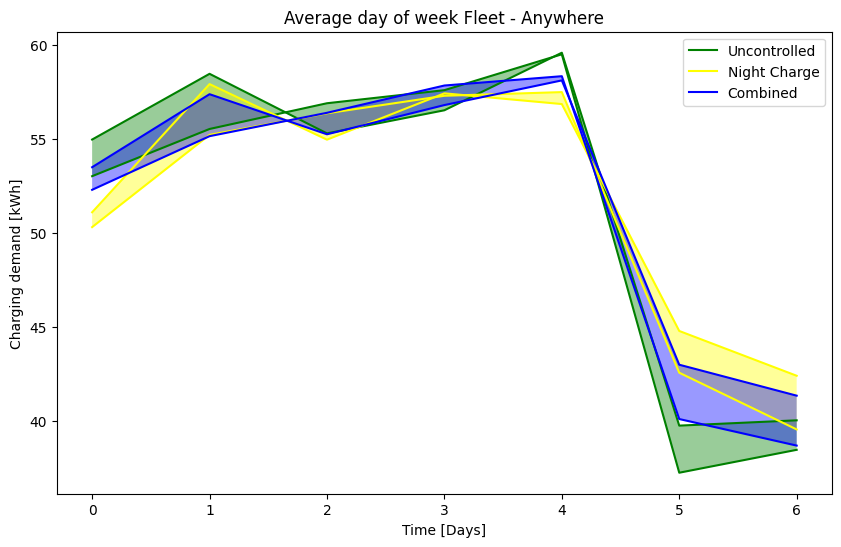

In [21]:
# You could for example also look at the average consumption of each day of the week. 
Weekavg_Fleet1 = Fleet1.groupby(Fleet1.index.dayofweek).mean()

plt.figure()
x = np.arange(0,7)
plt.figure(figsize=(10,6))
plt.plot(Weekavg_Fleet1['Uncontrolled'],color='green',label='Uncontrolled')
plt.plot(Weekavg_Fleet1['Uncontrolled2'],color='green')
plt.fill_between(x,Weekavg_Fleet1['Uncontrolled'], Weekavg_Fleet1['Uncontrolled2'],facecolor='green',alpha=0.4)
plt.plot(Weekavg_Fleet1['Nightcharge'],color='yellow',label='Night Charge')
plt.plot(Weekavg_Fleet1['Nightcharge2'],color='yellow')
plt.fill_between(x,Weekavg_Fleet1['Nightcharge'], Weekavg_Fleet1['Nightcharge2'],facecolor='yellow',alpha=0.4)
plt.plot(Weekavg_Fleet1['Combined'],color='blue',label='Combined')
plt.plot(Weekavg_Fleet1['Combined2'],color='blue')
plt.fill_between(x,Weekavg_Fleet1['Combined'], Weekavg_Fleet1['Combined2'],facecolor='blue',alpha=0.4)
plt.title('Average day of week Fleet - Anywhere')
plt.legend()
plt.xlabel('Time [Days]')
plt.ylabel('Charging demand [kWh]')
plt.show()


From the hourly average graphs can be determined that the combination of different charging strategies lowers the overall peaks. This is something that can be optimized further ofcourse. From the daily average mostly the difference between weekdays and weekends is visible. 

# Different EVs
Anohter variable that can be adjusted and anlyzes is the EV type. In the next analysis the type of EVs is adjusted to a fleet which has more small cars. For example, when using a car sharing platform it is very possible that there are more small EVs available instead of large EVs with higher battery capacities. \
For this example the same combination of charging strategies will be used ,but with the following cars: 100 Renault Zoe, 60 Tesla model 3, 20 Tesla model S and 20 Hyundai Kona. This situation is also already created and can be loaded in. 



In [22]:
#@title Import new scenario and combine data
#Load in new situation 
#Situation 4 - Smaller cars 
Fleet_smaller = pd.read_csv(path_fleet+'Fleet4_smallercars.csv').set_index('date')
Fleet_smaller_home = pd.read_csv(path_fleet +'Fleet4_smallercars_home.csv').set_index('date')
Fleet_smaller2 = pd.read_csv(path_fleet+'Fleet4_smallercars2.csv').set_index('date')
Fleet_smaller2_home = pd.read_csv(path_fleet +'Fleet4_smallercars2_home.csv').set_index('date')

#Combine different fleets and/or locations 
data = [Fleet_uncontrolled['0'], Fleet_uncontrolled_home['0'], Fleet_uncontrolled2['0'], Fleet_uncontrolled2_home['0'], Fleet_nightcharge['0'], Fleet_nightcharge_home['0'], Fleet_nightcharge2['0'], Fleet_nightcharge2_home['0'], Fleet_combined['0'], Fleet_combined_home['0'], Fleet_combined2['0'], Fleet_combined2_home['0'], Fleet_smaller['0'], Fleet_smaller_home['0'], Fleet_smaller2['0'], Fleet_smaller2_home['0']]
headers = ['Uncontrolled','Uncontrolled_home', 'Uncontrolled2','Uncontrolled2_home', 'Nightcharge','Nightcharge_home', 'Nightcharge2','Nightcharge2_home','Combined','Combined_home','Combined2','Combined2_home','Smaller','Smaller_home','Smaller2','Smaller2_home']
Fleet1 = pd.concat(data,axis=1,keys=headers)

#Set datetime index
Fleet1.index = pd.to_datetime(Fleet1.index)

#MWh to kWh
Fleet1 = Fleet1*1000

#Remove outliers
Fleet1[Fleet1 > 500] = 0

#Hourly average
Houravg_Fleet1 = Fleet1.groupby(Fleet1.index.hour).mean()

#Weekly average
Weekavg_Fleet1 = Fleet1.groupby(Fleet1.index.dayofweek).mean()

#Sum
Total_Fleet1_kWh = Fleet1.sum()

<Figure size 640x480 with 0 Axes>

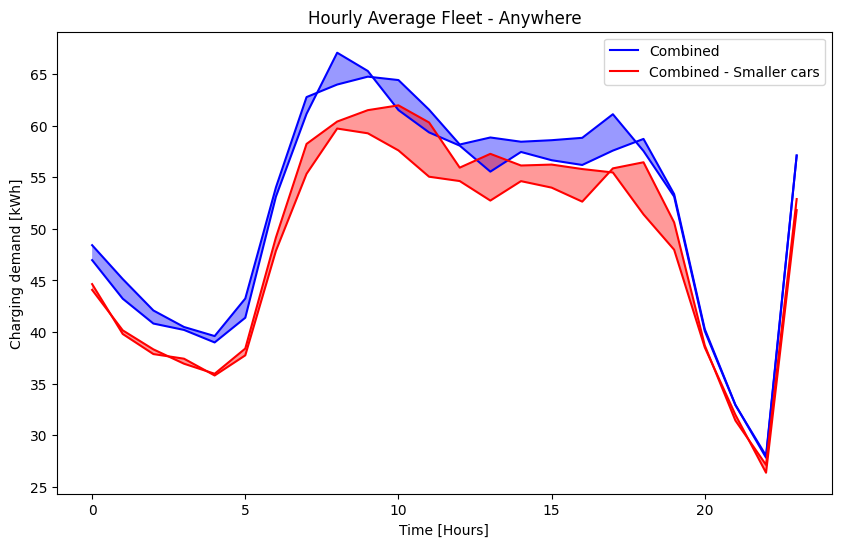

<Figure size 640x480 with 0 Axes>

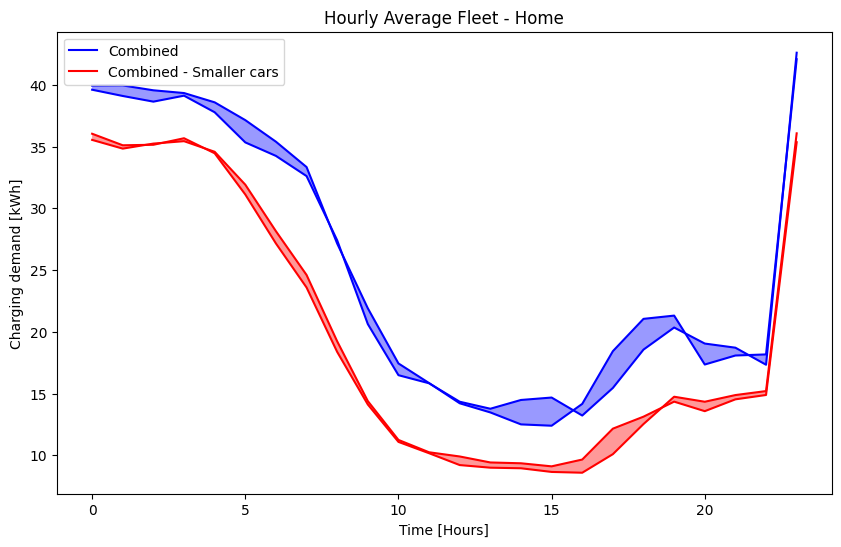

Combined          457457.482700
Combined2         449268.934600
Smaller           427188.385400
Smaller2          419707.536150
Combined_home     222194.332558
Combined2_home    218736.379925
Smaller_home      175504.125325
Smaller2_home     173111.863142
dtype: float64

In [23]:
#@title Plot hourly and daily average
#Hourly average
plt.figure()
x = np.arange(0,24)
plt.figure(figsize=(10,6))
plt.plot(Houravg_Fleet1['Combined'],color='blue',label='Combined')
plt.plot(Houravg_Fleet1['Combined2'],color='blue')
plt.fill_between(x,Houravg_Fleet1['Combined'], Houravg_Fleet1['Combined2'],facecolor='blue',alpha=0.4)
plt.plot(Houravg_Fleet1['Smaller'],color='red',label='Combined - Smaller cars')
plt.plot(Houravg_Fleet1['Smaller2'],color='red')
plt.fill_between(x,Houravg_Fleet1['Smaller'], Houravg_Fleet1['Smaller2'],facecolor='red',alpha=0.4)
plt.title('Hourly Average Fleet - Anywhere')
plt.legend()
plt.xlabel('Time [Hours]')
plt.ylabel('Charging demand [kWh]')
plt.show()

#Hourly average - Home
plt.figure()
x = np.arange(0,24)
plt.figure(figsize=(10,6))
plt.plot(Houravg_Fleet1['Combined_home'],color='blue',label='Combined')
plt.plot(Houravg_Fleet1['Combined2_home'],color='blue')
plt.fill_between(x,Houravg_Fleet1['Combined_home'], Houravg_Fleet1['Combined2_home'],facecolor='blue',alpha=0.4)
plt.plot(Houravg_Fleet1['Smaller_home'],color='red',label='Combined - Smaller cars')
plt.plot(Houravg_Fleet1['Smaller2_home'],color='red')
plt.fill_between(x,Houravg_Fleet1['Smaller_home'], Houravg_Fleet1['Smaller2_home'],facecolor='red',alpha=0.4)
plt.title('Hourly Average Fleet - Home')
plt.legend()
plt.xlabel('Time [Hours]')
plt.ylabel('Charging demand [kWh]')
plt.show()

#Total charging demand
Compare_total_kWh = Total_Fleet1_kWh.loc[['Combined','Combined2','Smaller','Smaller2','Combined_home','Combined2_home','Smaller_home','Smaller2_home']]
Compare_total_kWh




As you can see the total demand of smaller cars is lower compared to the previous situation. This is not caused by a difference in profile generation, because the driven distance is nearly identical (1,983,807 km compared to 1,983,364 km for the smaller cars). This indicates the difference between the electricity consumption per km, which is lower for the smaller electrical vehicles. \
Just like this comparisson there are many more variables that can be changed and analyzed when creating a new situation or fleet. For example: Other combinations of charging strategies, other EV models, different EV fleet sizes, different charing point parameters (power, charger availability at different locations) etc. Not only are there many more parameters that can be adjusted, there are also many more things that can be analyzed. Think of the different locations that are availabile (e.g. work), mobility profiles which include the distance traveled and demand requested by the EV, different climates, different seasons, SOC of the batteries etc. 